In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, power_transform
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/PGPDSE/Capstone/CSV Files/Diabetes_Preprocessed.csv')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,preceding_year_visits,number_diab_meds,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Not Available,Referral,1,41,0,1,0,0,0,Diabetes,Not Required,Not Required,1,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,no_med
1,Caucasian,0,15,Emergency,Discharged to home,Emergency,3,59,0,18,0,0,0,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0,0,1,1,insulin_only
2,AfricanAmerican,0,25,Emergency,Discharged to home,Emergency,2,11,5,13,2,0,1,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,1,0,3,1,0,other_meds
3,Caucasian,1,35,Emergency,Discharged to home,Emergency,2,44,1,16,0,0,0,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,1,1,0,0,1,1,insulin_only
4,Caucasian,1,45,Emergency,Discharged to home,Emergency,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,1,1,0,0,2,0,insulin_combo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97070 entries, 0 to 97069
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      97070 non-null  object
 1   gender                    97070 non-null  int64 
 2   age                       97070 non-null  int64 
 3   admission_type_id         97070 non-null  object
 4   discharge_disposition_id  97070 non-null  object
 5   admission_source_id       97070 non-null  object
 6   time_in_hospital          97070 non-null  int64 
 7   num_lab_procedures        97070 non-null  int64 
 8   num_procedures            97070 non-null  int64 
 9   num_medications           97070 non-null  int64 
 10  number_outpatient         97070 non-null  int64 
 11  number_emergency          97070 non-null  int64 
 12  number_inpatient          97070 non-null  int64 
 13  diag_1                    97070 non-null  object
 14  diag_2                

In [ ]:
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'preceding_year_visits', 'number_diab_meds', 'number_changes']

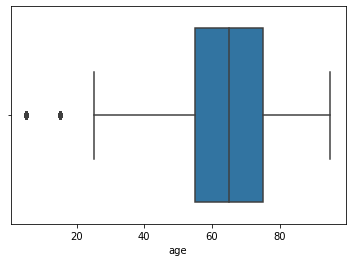

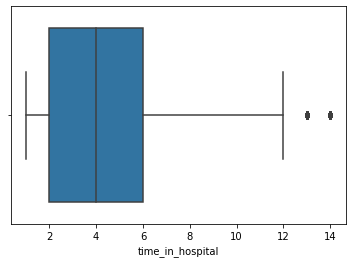

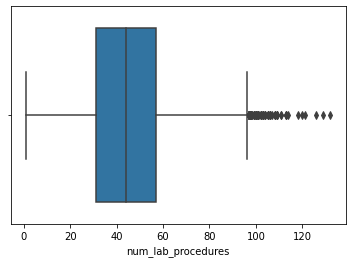

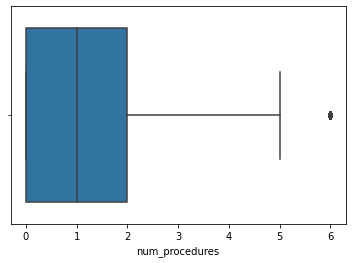

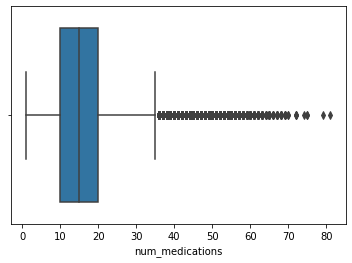

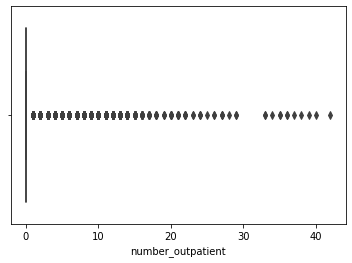

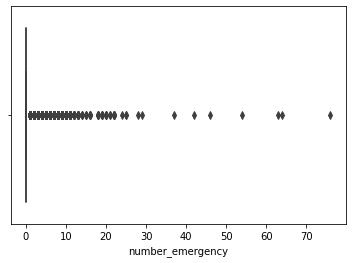

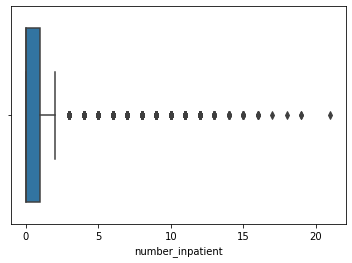

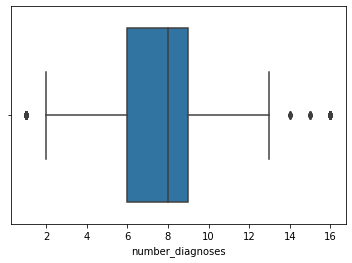

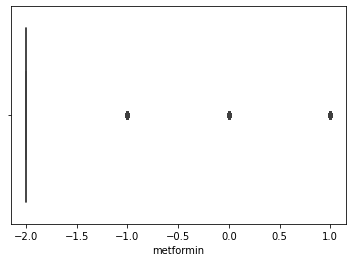

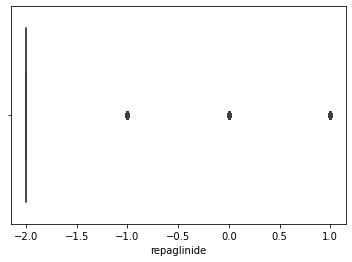

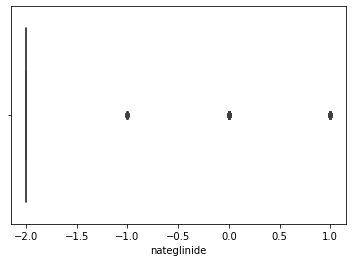

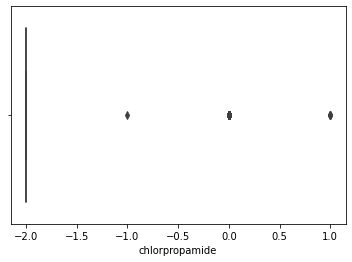

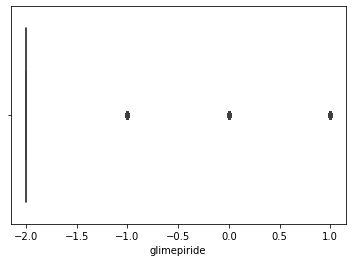

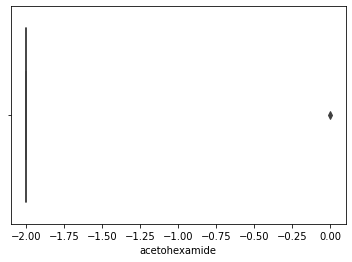

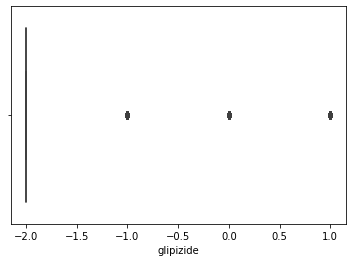

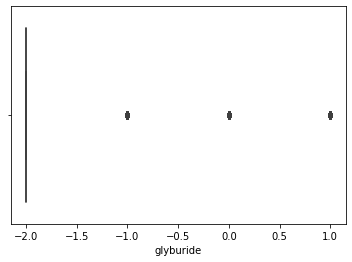

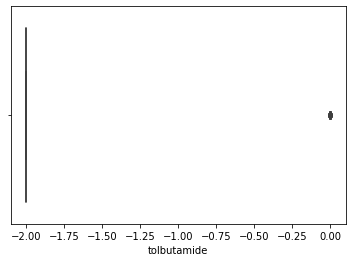

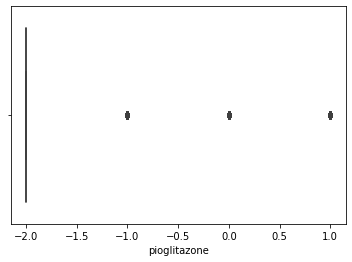

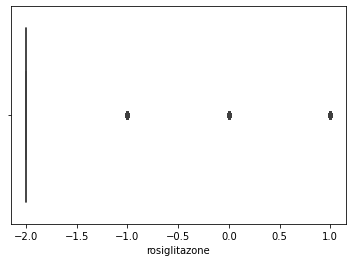

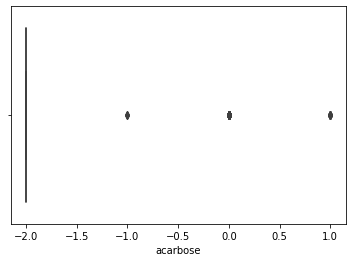

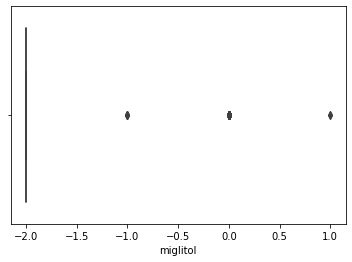

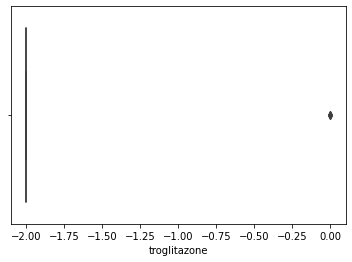

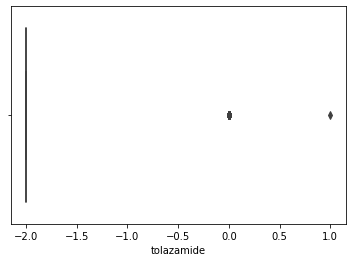

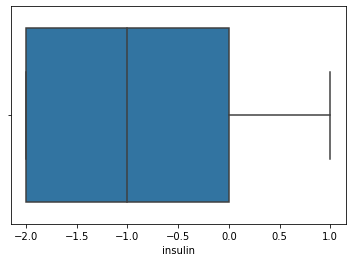

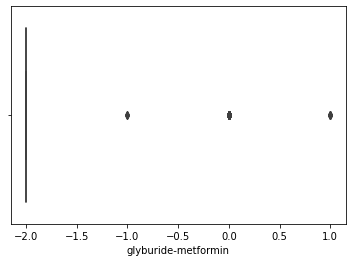

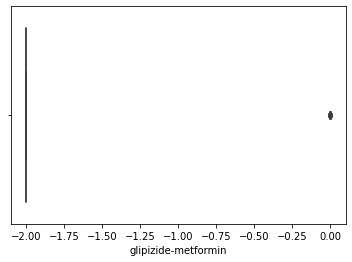

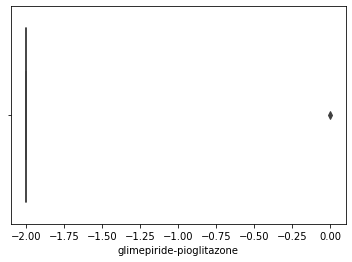

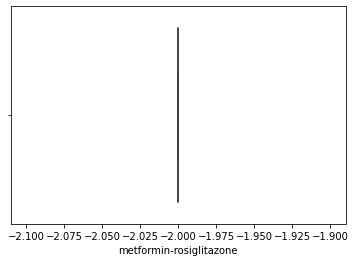

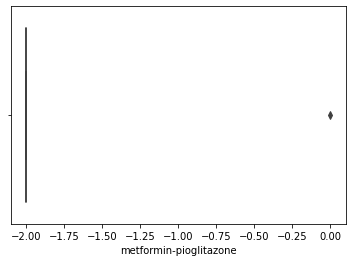

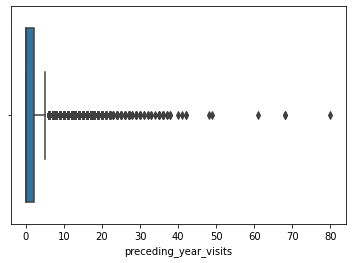

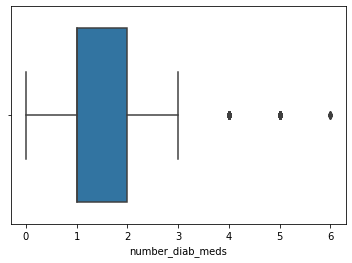

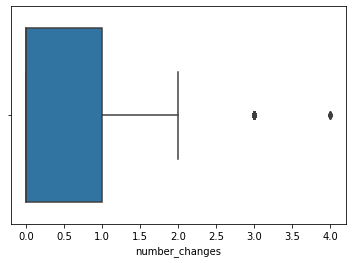

In [ ]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'preceding_year_visits', 'number_diab_meds', 'number_changes',
       'insulin_treatment'],
      dtype='object')

In [ ]:
for i in ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']:
 print(df[i].value_counts(),'\n')

-2    77697
 0    17777
 1     1035
-1      561
Name: metformin, dtype: int64 

-2    95562
 0     1359
 1      106
-1       43
Name: repaglinide, dtype: int64 

-2    96389
 0      647
 1       23
-1       11
Name: nateglinide, dtype: int64 

-2    96987
 0       76
 1        6
-1        1
Name: chlorpropamide, dtype: int64 

-2    92105
 0     4466
 1      316
-1      183
Name: glimepiride, dtype: int64 

-2    97069
 0        1
Name: acetohexamide, dtype: int64 

-2    84827
 0    10963
 1      748
-1      532
Name: glipizide, dtype: int64 

-2    86820
 0     8925
 1      783
-1      542
Name: glyburide, dtype: int64 

-2    97050
 0       20
Name: tolbutamide, dtype: int64 

-2    89970
 0     6758
 1      226
-1      116
Name: pioglitazone, dtype: int64 

-2    90907
 0     5913
 1      168
-1       82
Name: rosiglitazone, dtype: int64 

-2    96771
 0      286
 1       10
-1        3
Name: acarbose, dtype: int64 

-2    97032
 0       31
-1        5
 1        2
Name: miglitol, d

In [ ]:
df = df.drop('metformin-rosiglitazone', 1)

In [ ]:
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 
       'preceding_year_visits', 'number_diab_meds', 'number_changes']

In [ ]:
for i in num_cols:
    print(i, df[i].skew(), '\n')

age -0.6252653355646172 

time_in_hospital 1.1411393564324346 

num_lab_procedures -0.23970335089394984 

num_procedures 1.3203963443071582 

num_medications 1.3313285726526911 

number_outpatient 8.81127306079252 

number_emergency 22.651845639513823 

number_inpatient 3.6163762573103426 

number_diagnoses -0.8855291560642684 

metformin 1.5998606392198451 

repaglinide 8.1379482504768 

nateglinide 12.050770200998418 

chlorpropamide 35.27275356017414 

glimepiride 4.252199146120854 

acetohexamide 311.56058800817556 

glipizide 2.3833126311624984 

glyburide 2.7345879444178482 

tolbutamide 69.64660880105657 

pioglitazone 3.3572338598311586 

rosiglitazone 3.6509831571511793 

acarbose 18.25832937498443 

miglitol 53.63961272404322 

troglitazone 179.874029899614 

tolazamide 50.45249850121383 

insulin 0.39579523685755547 

glyburide-metformin 11.969629555195413 

glipizide-metformin 86.39533490716094 

glimepiride-pioglitazone 311.56058800817533 

metformin-pioglitazone 311.56058

In [ ]:
df[num_cols].isna().sum()

age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-pioglitazone      0
preceding_year_visits       0
number_diab_meds            0
number_changes              0
dtype: int64

In [ ]:
pt = PowerTransformer(method = 'yeo-johnson')
df_pt = pd.DataFrame(pt.fit_transform(df[num_cols]), columns = num_cols)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [ ]:
skew_df = pd.DataFrame({"Skew_Before" : df[num_cols].skew(), "Skew_After" : df_pt.skew()})
skew_df

,Skew_Before,Skew_After
age,-0.625265,-0.119083
time_in_hospital,1.141139,0.012974
num_lab_procedures,-0.239703,-0.230143
num_procedures,1.320396,0.207424
num_medications,1.331329,0.019316
number_outpatient,8.811273,1.796058
number_emergency,22.651846,2.438005
number_inpatient,3.616376,0.737851
number_diagnoses,-0.885529,-0.154843
metformin,1.599861,1.506761


In [ ]:
X = df.drop('readmitted', 1)
y = df['readmitted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, stratify = y)

In [ ]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [ ]:
for i in meds:
    print(X_train[i].value_counts(), '\n')

-2    58269
 0    13343
 1      759
-1      431
Name: metformin, dtype: int64 

-2    71672
 0     1012
 1       81
-1       37
Name: repaglinide, dtype: int64 

-2    72282
 0      491
 1       20
-1        9
Name: nateglinide, dtype: int64 

-2    72742
 0       53
 1        6
-1        1
Name: chlorpropamide, dtype: int64 

-2    69130
 0     3311
 1      226
-1      135
Name: glimepiride, dtype: int64 

-2    72801
 0        1
Name: acetohexamide, dtype: int64 

-2    63635
 0     8203
 1      559
-1      405
Name: glipizide, dtype: int64 

-2    65056
 0     6722
 1      611
-1      413
Name: glyburide, dtype: int64 

-2    72786
 0       16
Name: tolbutamide, dtype: int64 

-2    67487
 0     5062
 1      163
-1       90
Name: pioglitazone, dtype: int64 

-2    68165
 0     4446
 1      125
-1       66
Name: rosiglitazone, dtype: int64 

-2    72597
 0      195
 1        8
-1        2
Name: acarbose, dtype: int64 

-2    72777
 0       19
-1        4
 1        2
Name: miglitol, d